In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# Load data
df = pd.read_csv('EMG-data.csv')
df.head(40)

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
5,9,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
6,10,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
7,11,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
8,12,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
9,13,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1


In [3]:
df.drop('time', inplace=True, axis=1)

df.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1


In [4]:
print(df['class'].value_counts())

class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


In [5]:
df.drop(df[df['class'] == 0].index, inplace=True)

In [6]:
data = df[df['class'] != 7]

In [7]:
data['class'].value_counts()

class
6    253009
5    251733
4    251570
1    250055
3    249494
2    243193
Name: count, dtype: int64

In [8]:
data.drop('label', inplace=True, axis=1)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_42952\980467118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('label', inplace=True, axis=1)


In [9]:
# Select data from channels (all columns except 'time', 'class', and 'label')
X = data.iloc[:, 1:9]  # Columns from channel1 to channel8
y = data['class']  # Class labels

In [10]:
# Data normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
import numpy as np
import pywt
import scipy.io
import matplotlib.pyplot as plt
from vmdpy import VMD
import itertools

In [12]:
import pywt

def dwp_denoising(emg_signal, wavelet='db4', level=5):
    # Perform Wavelet Packet Decomposition
    wp = pywt.WaveletPacket(data=emg_signal, wavelet=wavelet, mode='symmetric', maxlevel=level)

    # Reconstruct the signal using approximation and details
    new_wp = wp.get_level(level)
    new_wp = [node for node in new_wp if 'a' in node.path]  # Keep approximation coefficients
    
    # Reconstruct denoised signal
    denoised_signal = sum(node.data for node in new_wp)
    return denoised_signal

# Example Usage:
# denoised_signal_dwp = dwp_denoising(emg_data[0], level=5)


In [13]:
denoised_signal_dwp = dwp_denoising(X[0], level=5)

In [14]:
import numpy as np
import scipy.signal as signal

def pad_signal(signal, target_len=12):
    """Pad the signal with zeros if it is shorter than the required length."""
    if len(signal) < target_len:
        padded_signal = np.pad(signal, (0, target_len - len(signal)), mode='constant')
        return padded_signal
    else:
        return signal

def tqwt_decompose(emg_signal, Q, r, J, padlen=5):
    """
    Perform TQWT decomposition of the signal into subbands.
    Args:
    emg_signal: Input EMG signal (1D array).
    Q: Tunable Q-factor.
    r: Redundancy factor.
    J: Number of subbands (decomposition levels).
    padlen: Padding length for filtfilt function.
    
    Returns:
    subbands: A list of decomposed subbands.
    """
    beta = 1 / Q
    alpha = (1 + r) / (1 - r)
    
    subbands = []
    residual = emg_signal
    
    # Ensure signal is long enough by padding it
    residual = pad_signal(residual, target_len=padlen)
    
    # Nyquist frequency (half the sampling rate)
    nyquist = 0.5 * len(emg_signal)
    
    for j in range(J):
        # Calculate cutoff and ensure it's within the valid range (greater than 0 and less than Nyquist frequency)
        cutoff = beta / (alpha ** j)
        cutoff = min(max(cutoff, 1e-6), nyquist - 1e-6)  # Ensures cutoff is > 0 and < Nyquist
        
        # Design low-pass filter
        b, a = signal.butter(3, cutoff / nyquist, btype='low')  # Normalized cutoff frequency
        
        # Apply low-pass filter with custom padlen
        approx = signal.filtfilt(b, a, residual, padlen=padlen)
        detail = residual - approx
        
        subbands.append(detail)
        residual = approx
    
    subbands.append(residual)
    
    return subbands

def tqwt_reconstruct(subbands):
    """Reconstruct the signal from TQWT subbands."""
    reconstructed_signal = np.sum(subbands, axis=0)
    return reconstructed_signal

def tqwt_denoising(emg_signal, Q=1, r=3, J=10, padlen=5):
    """
    Perform TQWT denoising on a single EMG signal.
    Args:
    emg_signal: Input EMG signal (1D array).
    Q: Tunable Q-factor.
    r: Redundancy factor.
    J: Number of subbands (decomposition levels).
    padlen: Padding length for filtfilt function.
    
    Returns:
    denoised_signal: The denoised signal after TQWT reconstruction.
    """
    # Decompose the signal into subbands
    subbands = tqwt_decompose(emg_signal, Q, r, J, padlen)
    
    # Reconstruct the signal (denoised) by summing subbands
    denoised_signal = tqwt_reconstruct(subbands)
    
    return denoised_signal

def tqwt_denoising_all(emg_data, Q=1, r=3, J=10, padlen=5):
    """
    Perform TQWT denoising on multiple EMG signals.
    Args:
    emg_data: 2D array where each row represents a different signal.
    Q: Tunable Q-factor.
    r: Redundancy factor.
    J: Number of subbands (decomposition levels).
    padlen: Padding length for filtfilt function.
    
    Returns:
    denoised_signals: 2D array of denoised signals.
    """
    denoised_signals = []
    for signal in emg_data:
        denoised_signal = tqwt_denoising(signal, Q, r, J, padlen)
        denoised_signals.append(denoised_signal)
    return np.array(denoised_signals)

# Example usage:
# denoised_signals_tqwt = tqwt_denoising_all(emg_data, Q=1, r=3, J=10, padlen=5)


In [15]:


# Parameters for TQWT
Q = 1  # Tunable Q-factor
r = 3  # Redundancy factor
J = 10  # Number of decomposition levels
padlen = 5  # Padding length for filtfilt

# Perform TQWT denoising on all EMG signals in the dataset
denoised_signals_tqwt = tqwt_denoising_all(X, Q, r, J, padlen)



In [16]:
from vmdpy import VMD

def vmd_denoising_all(emg_data, alpha=2000, tau=0, K=5, DC=0, init=1, tol=1e-7):
    denoised_signals = []
    for signal in emg_data:
        u, u_hat, omega = VMD(signal, alpha, tau, K, DC, init, tol)
        denoised_signal = np.sum(u[1:], axis=0)  # Discard the first mode (usually noise)
        denoised_signals.append(denoised_signal)
    return np.array(denoised_signals)

# Example Usage:
# denoised_signals_vmd = vmd_denoising_all(emg_data, K=5)
denoised_signals_vmd = vmd_denoising_all(X, K=5)

In [17]:
import pywt

def dwp_denoising_all(emg_data, wavelet='db4', level=5):
    denoised_signals = []
    for signal in emg_data:
        wp = pywt.WaveletPacket(data=signal, wavelet=wavelet, mode='symmetric', maxlevel=level)
        new_wp = wp.get_level(level)
        new_wp = [node for node in new_wp if 'a' in node.path]  # Keep approximation coefficients
        denoised_signal = sum(node.data for node in new_wp)
        denoised_signals.append(denoised_signal)
    return np.array(denoised_signals)

# Example Usage:
denoised_signals_dwp = dwp_denoising_all(X, level=5)


In [21]:
denoised_signals_dwp.shape

(1499054, 7)

In [18]:
denoised_signals_tqwt.shape

(1499054, 8)

In [20]:
X.shape

(1499054, 8)

In [22]:
sig1=tqwt_denoising_all(X, Q, r, J, padlen)

In [23]:
sig2=vmd_denoising_all(sig1, K=5)

In [24]:
seq=dwp_denoising_all(sig2, level=5)

In [29]:
seq.shape

(1499054, 7)

In [30]:
denoised_signals_dwp2=denoised_signals_dwp

In [32]:
import numpy as np

def append_vmd_column_to_dwp(denoised_vmd, denoised_dwp):
    """
    Append the 8th column from the denoised_vmd signal to the denoised_dwp signal.
    
    Args:
    denoised_vmd: The signal denoised using VMD (2D array).
    denoised_dwp: The signal denoised using DWP (2D array).
    
    Returns:
    denoised_dwp_extended: The DWP signal with the 8th column from the VMD signal appended.
    """
    # Ensure the 8th column exists in denoised_vmd
    if denoised_vmd.shape[1] < 8:
        raise ValueError("denoised_vmd does not have an 8th column.")
    
    # Extract the 8th column from denoised_vmd
    vmd_8th_column = denoised_vmd[:, 7]  # 7th index is the 8th column (0-based index)
    
    # Ensure the number of rows match between the two arrays
    if denoised_dwp.shape[0] != denoised_vmd.shape[0]:
        raise ValueError("Row counts of denoised_vmd and denoised_dwp do not match.")
    
    # Reshape vmd_8th_column to make it a 2D column for concatenation
    vmd_8th_column = vmd_8th_column.reshape(-1, 1)
    
    # Append the 8th column from VMD to DWP signal
    denoised_dwp_extended = np.concatenate((denoised_dwp, vmd_8th_column), axis=1)
    
    return denoised_dwp_extended

# Example usage:
# Assuming denoised_vmd and denoised_dwp are the denoised signals (2D arrays)
# denoised_vmd = np.array([...])  # The denoised signal using VMD (should have at least 8 columns)
# denoised_dwp = np.array([...])  # The denoised signal using DWP

# Append the 8th column from VMD to DWP
denoised_signals_dwp2 = append_vmd_column_to_dwp(denoised_signals_vmd, denoised_signals_dwp2)

# denoised_dwp_extended now has the 8th column from VMD appended


In [33]:
denoised_signals_dwp2.shape

(1499054, 8)

In [34]:
denoised_signals_vmd[0]

array([ 0.03061698, -0.20717697, -0.19423778,  0.36339464,  0.28020962,
        0.25083925,  0.32874871, -0.85250823])

In [35]:
denoised_signals_dwp2[0]

array([-1.94837052,  2.16126335, -1.04950723,  3.78631547,  2.18042263,
       -4.24675373, -6.43706412, -0.85250823])

In [36]:
import numpy as np
from scipy.signal import resample

def resample_signal(signal, target_length):
    """
    Resample the signal to match the target length.
    Args:
    signal: The input signal (1D or 2D array).
    target_length: The desired length of the output signal.
    
    Returns:
    resampled_signal: The signal resampled to the target length.
    """
    return resample(signal, target_length, axis=0)

def fuse_denoised_signals(denoised_vmd, denoised_tqwt, denoised_dmd, fusion_type='average'):
    """
    Fuse denoised signals using averaging or other strategies.
    Args:
    denoised_vmd: The signal denoised using VMD (1D or 2D array).
    denoised_tqwt: The signal denoised using TQWT (1D or 2D array).
    denoised_dmd: The signal denoised using DMD (1D or 2D array).
    fusion_type: Method to fuse signals ('average', 'weighted', etc.).
    
    Returns:
    fused_signal: The final fused signal (1D array or 2D array for multiple signals).
    """
    # Find the minimum length to resample all signals to the shortest signal's length
    min_length = min(denoised_vmd.shape[0], denoised_tqwt.shape[0], denoised_dmd.shape[0])
    
    # Resample all signals to the same length
    denoised_vmd_resampled = resample_signal(denoised_vmd, min_length)
    denoised_tqwt_resampled = resample_signal(denoised_tqwt, min_length)
    denoised_dmd_resampled = resample_signal(denoised_dmd, min_length)
    
    if fusion_type == 'average':
        # Simple averaging fusion
        fused_signal = (denoised_vmd_resampled + denoised_tqwt_resampled + denoised_dmd_resampled) / 3
    elif fusion_type == 'weighted':
        # Example of weighted fusion (you can modify the weights)
        weight_vmd = 0.4
        weight_tqwt = 0.3
        weight_dmd = 0.3
        fused_signal = (weight_vmd * denoised_vmd_resampled +
                        weight_tqwt * denoised_tqwt_resampled +
                        weight_dmd * denoised_dmd_resampled)
    else:
        raise ValueError("Invalid fusion type specified. Choose 'average' or 'weighted'.")
    
    return fused_signal

# Example usage:
# Assuming denoised_vmd, denoised_tqwt, denoised_dmd are your denoised signals (1D or 2D arrays)
# denoised_vmd = np.array([...])  # The denoised signal using VMD
# denoised_tqwt = np.array([...])  # The denoised signal using TQWT
# denoised_dmd = np.array([...])  # The denoised signal using DMD

# Fuse the signals
fused_emg_signal = fuse_denoised_signals(denoised_signals_vmd, denoised_signals_tqwt, denoised_signals_dwp2, fusion_type='average')

In [37]:
X1=seq
X2=fused_emg_signal

In [40]:
y.shape

(1499054,)

In [41]:
from sklearn.preprocessing import OneHotEncoder

# Reshape y to a 2D array
y_reshaped = y.values.reshape(-1, 1)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the labels into one-hot encoding
y_one_hot = encoder.fit_transform(y_reshaped)

# Convert the result back into a DataFrame for easier visualization
y_one_hot_df = pd.DataFrame(y_one_hot, columns=[f'gesture_{int(i)}' for i in range(1, 7)])

# Print the first few rows of the one-hot encoded labels
print(y_one_hot_df.head(10))

   gesture_1  gesture_2  gesture_3  gesture_4  gesture_5  gesture_6
0        1.0        0.0        0.0        0.0        0.0        0.0
1        1.0        0.0        0.0        0.0        0.0        0.0
2        1.0        0.0        0.0        0.0        0.0        0.0
3        1.0        0.0        0.0        0.0        0.0        0.0
4        1.0        0.0        0.0        0.0        0.0        0.0
5        1.0        0.0        0.0        0.0        0.0        0.0
6        1.0        0.0        0.0        0.0        0.0        0.0
7        1.0        0.0        0.0        0.0        0.0        0.0
8        1.0        0.0        0.0        0.0        0.0        0.0
9        1.0        0.0        0.0        0.0        0.0        0.0


In [61]:
X1.shape

(1499054, 7)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y_one_hot_df, test_size=0.2, random_state=42)
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

Sequential

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_cnn_bilstm_model(input_shape, num_classes):
    """
    Builds a CNN-Bidirectional LSTM model for gesture classification.
    
    Args:
    input_shape: Shape of the input data (features, 1).
    num_classes: The number of output classes for classification.
    
    Returns:
    model: A Keras model instance.
    """
    
    # Input layer
    input_layer = Input(shape=input_shape)
    
    # 1D Convolutional layers to extract spatial features
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    # Bidirectional LSTM layers to capture temporal dependencies
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Bidirectional(LSTM(64))(x)
    
    # Fully connected layers
    x = Dense(128, activation='relu')(x)  # New dense layer added
    x = Dropout(0.5)(x)  # Dropout for regularization
    
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)  # Dropout for regularization
    
    # Output layer with softmax activation for classification
    output_layer = Dense(num_classes, activation='softmax')(x)
    
    # Build the model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Example usage:
features = 7  # Number of EMG channels (features)
num_classes = 6  # Number of gesture classes

# Input shape for the Bidirectional LSTM-CNN model (features, 1)
input_shape = (features, 1)

# Build the model
model = build_cnn_bilstm_model(input_shape, num_classes)

# Summary of the model architecture
model.summary()


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 7, 1)]            0         
                                                                 
 conv1d_18 (Conv1D)          (None, 7, 64)             256       
                                                                 
 batch_normalization_16 (Ba  (None, 7, 64)             256       
 tchNormalization)                                               
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 3, 64)             0         
 ng1D)                                                           
                                                                 
 conv1d_19 (Conv1D)          (None, 3, 128)            24704     
                                                                 
 batch_normalization_17 (Ba  (None, 3, 128)            512 

In [85]:
y_train.shape

(1199243, 6)

In [86]:
model_history=model.fit(x=X_train, y=y_train, epochs=50,validation_split=0.22, verbose=1)

Epoch 1/50
29232/29232 [==============================] - 492s 17ms/step - loss: 0.6864 - accuracy: 0.7438 - val_loss: 0.5557 - val_accuracy: 0.7868
Epoch 2/50
29232/29232 [==============================] - 497s 17ms/step - loss: 0.5825 - accuracy: 0.7839 - val_loss: 0.4989 - val_accuracy: 0.8070
Epoch 3/50
29232/29232 [==============================] - 495s 17ms/step - loss: 0.5443 - accuracy: 0.7978 - val_loss: 0.4642 - val_accuracy: 0.8183
Epoch 4/50
29232/29232 [==============================] - 495s 17ms/step - loss: 0.5166 - accuracy: 0.8085 - val_loss: 0.4298 - val_accuracy: 0.8327
Epoch 5/50
29232/29232 [==============================] - 480s 16ms/step - loss: 0.4956 - accuracy: 0.8172 - val_loss: 0.4294 - val_accuracy: 0.8332
Epoch 6/50
29232/29232 [==============================] - 468s 16ms/step - loss: 0.4769 - accuracy: 0.8236 - val_loss: 0.4006 - val_accuracy: 0.8425
Epoch 7/50
29232/29232 [==============================] - 499s 17ms/step - loss: 0.4620 - accuracy: 0.8291

In [87]:
y_pred_test = model.predict(X_test)
#y_pred_test = np.argmax(y_pred_test, axis=1)  # One-hot encoding'den etiketlere

9370/9370 [==============================] - 33s 3ms/step


In [88]:
y_pred_test.shape

(299811, 6)

In [89]:
y_test.shape

(299811, 6)

In [90]:
y_pred_test

array([[1.07214450e-20, 5.20744761e-05, 5.20689413e-04, 9.82829750e-01,
        1.64977852e-02, 9.98000323e-05],
       [0.00000000e+00, 1.55963079e-13, 9.21595300e-10, 6.77217031e-05,
        9.99928951e-01, 3.32188756e-06],
       [3.90435850e-23, 1.39992222e-08, 3.73120406e-06, 6.56295614e-03,
        2.53640622e-01, 7.39792705e-01],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.11196603e-18, 7.07707613e-07, 4.68499711e-05, 1.87037960e-02,
        2.68688589e-01, 7.12560117e-01],
       [1.59023383e-09, 3.05413920e-02, 6.37204111e-01, 4.88737691e-03,
        1.09497644e-01, 2.17869461e-01]], dtype=float32)

In [91]:
y_test

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]])

In [92]:
# Assuming 'softmax_output' is the output from the softmax layer (shape: (batch_size, num_classes))
# Example of softmax output:
softmax_output = y_pred_test     # Another sample with 6 class probabilities

# Get the index of the maximum probability for each sample (argmax)
predicted_classes = np.argmax(softmax_output, axis=1)

# Convert the predicted class indices to one-hot encoding
y_one_hot_output = tf.keras.utils.to_categorical(predicted_classes, num_classes=softmax_output.shape[1])

# Output the one-hot encoded predictions
print(y_one_hot_output)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]


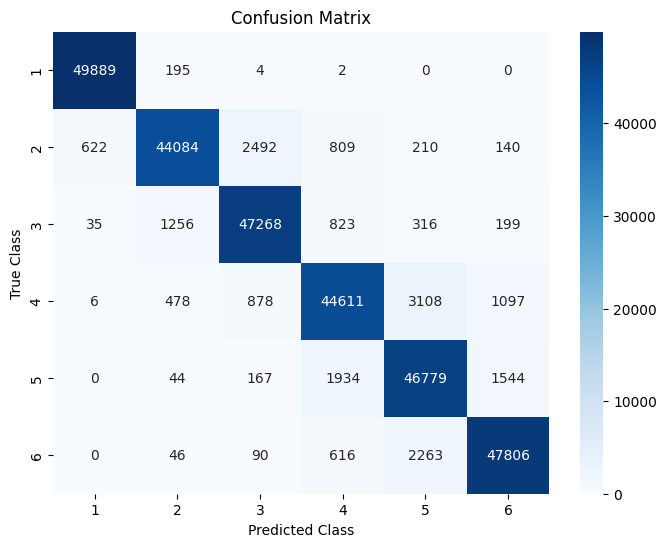

In [93]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert one-hot encoded vectors to class indices using argmax
y_true_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_one_hot_output, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_class, y_pred_class)

# Display the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [94]:
from sklearn.metrics import classification_report

# accuracy and F1 score of classes
rapor = classification_report(y_test, y_one_hot_output, target_names=['1','2','3','4','5','6'])
print(rapor)

              precision    recall  f1-score   support

           1       0.99      1.00      0.99     50090
           2       0.96      0.91      0.93     48357
           3       0.93      0.95      0.94     49897
           4       0.91      0.89      0.90     50178
           5       0.89      0.93      0.91     50468
           6       0.94      0.94      0.94     50821

   micro avg       0.94      0.94      0.94    299811
   macro avg       0.94      0.94      0.94    299811
weighted avg       0.94      0.94      0.94    299811
 samples avg       0.94      0.94      0.94    299811



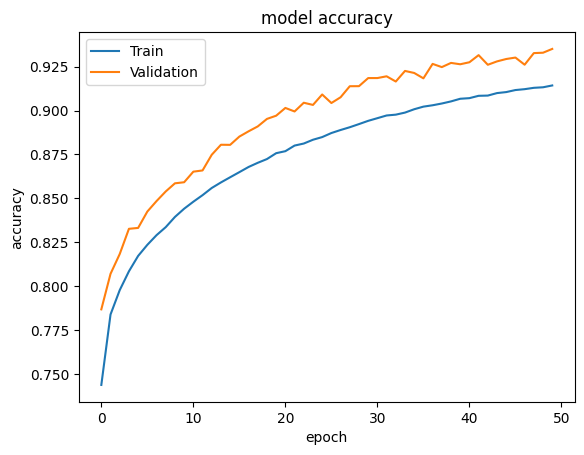

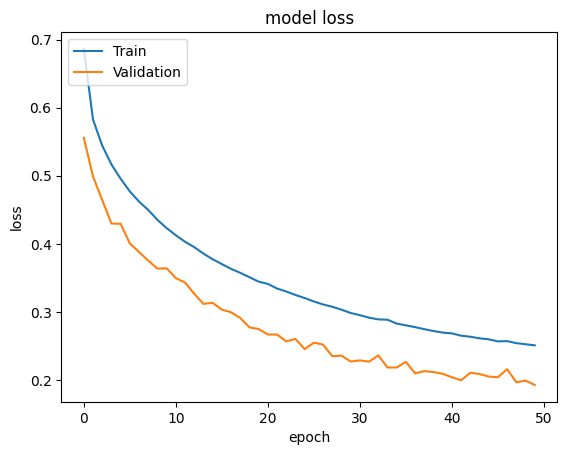

In [99]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

ENsemble

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y_one_hot_df, test_size=0.2, random_state=42)
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_cnn_bilstm_model(input_shape, num_classes):
    """
    Builds a CNN-Bidirectional LSTM model for gesture classification.
    
    Args:
    input_shape: Shape of the input data (features, 1).
    num_classes: The number of output classes for classification.
    
    Returns:
    model: A Keras model instance.
    """
    
    # Input layer
    input_layer = Input(shape=input_shape)
    
    # 1D Convolutional layers to extract spatial features
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    # Bidirectional LSTM layers to capture temporal dependencies
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Bidirectional(LSTM(64))(x)
    
    # Fully connected layers
    x = Dense(128, activation='relu')(x)  # New dense layer added
    x = Dropout(0.5)(x)  # Dropout for regularization
    
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)  # Dropout for regularization
    
    # Output layer with softmax activation for classification
    output_layer = Dense(num_classes, activation='softmax')(x)
    
    # Build the model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Example usage:
features = 8  # Number of EMG channels (features)
num_classes = 6  # Number of gesture classes

# Input shape for the Bidirectional LSTM-CNN model (features, 1)
input_shape = (features, 1)

# Build the model
model2 = build_cnn_bilstm_model(input_shape, num_classes)

# Summary of the model architecture
model2.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 8, 1)]            0         
                                                                 
 conv1d_24 (Conv1D)          (None, 8, 64)             256       
                                                                 
 batch_normalization_22 (Ba  (None, 8, 64)             256       
 tchNormalization)                                               
                                                                 
 max_pooling1d_22 (MaxPooli  (None, 4, 64)             0         
 ng1D)                                                           
                                                                 
 conv1d_25 (Conv1D)          (None, 4, 128)            24704     
                                                                 
 batch_normalization_23 (Ba  (None, 4, 128)            512

In [107]:
model_history=model2.fit(x=X_train, y=y_train, epochs=50,validation_split=0.22, verbose=1)

Epoch 1/50
29232/29232 [==============================] - 545s 18ms/step - loss: 0.0977 - accuracy: 0.9693 - val_loss: 0.0398 - val_accuracy: 0.9872
Epoch 2/50
29232/29232 [==============================] - 511s 17ms/step - loss: 0.0474 - accuracy: 0.9857 - val_loss: 0.0349 - val_accuracy: 0.9884
Epoch 3/50
29232/29232 [==============================] - 452s 15ms/step - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0214 - val_accuracy: 0.9937
Epoch 4/50
29232/29232 [==============================] - 448s 15ms/step - loss: 0.0337 - accuracy: 0.9904 - val_loss: 0.0178 - val_accuracy: 0.9943
Epoch 5/50
29232/29232 [==============================] - 505s 17ms/step - loss: 0.0301 - accuracy: 0.9913 - val_loss: 0.0252 - val_accuracy: 0.9921
Epoch 6/50
29232/29232 [==============================] - 534s 18ms/step - loss: 0.0287 - accuracy: 0.9918 - val_loss: 0.0194 - val_accuracy: 0.9943
Epoch 7/50
29232/29232 [==============================] - 537s 18ms/step - loss: 0.0271 - accuracy: 0.9923

In [108]:
y_pred_test = model.predict(X_test)
#y_pred_test = np.argmax(y_pred_test, axis=1)  # One-hot encoding'den etiketlere

9370/9370 [==============================] - 37s 4ms/step


In [109]:
# Assuming 'softmax_output' is the output from the softmax layer (shape: (batch_size, num_classes))
# Example of softmax output:
softmax_output = y_pred_test     # Another sample with 6 class probabilities

# Get the index of the maximum probability for each sample (argmax)
predicted_classes = np.argmax(softmax_output, axis=1)

# Convert the predicted class indices to one-hot encoding
y_one_hot_output = tf.keras.utils.to_categorical(predicted_classes, num_classes=softmax_output.shape[1])

# Output the one-hot encoded predictions
print(y_one_hot_output)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]


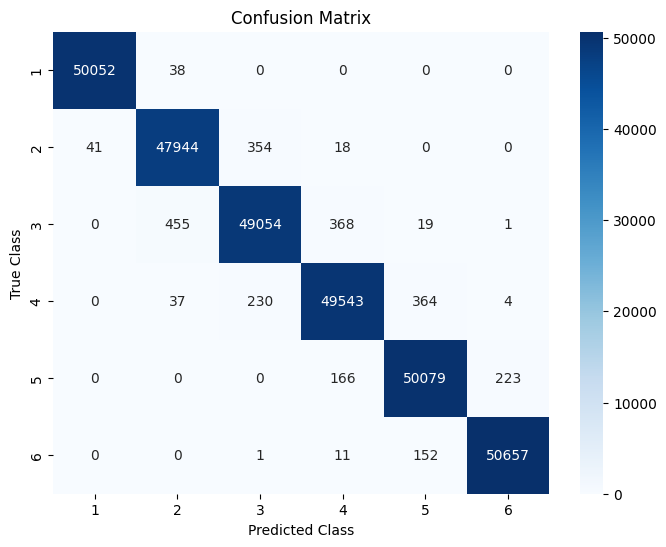

In [110]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert one-hot encoded vectors to class indices using argmax
y_true_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_one_hot_output, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_class, y_pred_class)

# Display the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [111]:
from sklearn.metrics import classification_report

# accuracy and F1 score of classes
rapor = classification_report(y_test, y_one_hot_output, target_names=['1','2','3','4','5','6'])
print(rapor)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     50090
           2       0.99      0.99      0.99     48357
           3       0.99      0.98      0.99     49897
           4       0.99      0.99      0.99     50178
           5       0.99      0.99      0.99     50468
           6       1.00      1.00      1.00     50821

   micro avg       0.99      0.99      0.99    299811
   macro avg       0.99      0.99      0.99    299811
weighted avg       0.99      0.99      0.99    299811
 samples avg       0.99      0.99      0.99    299811



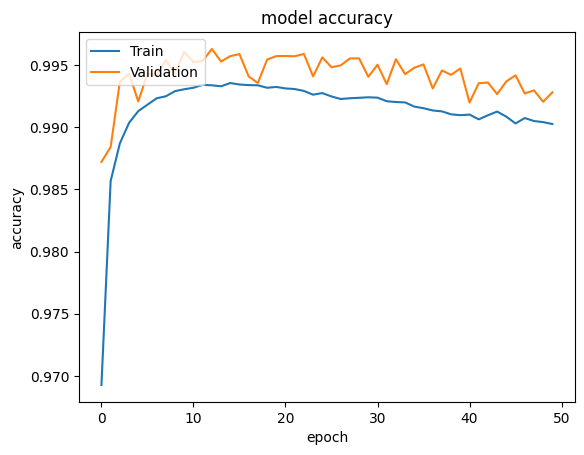

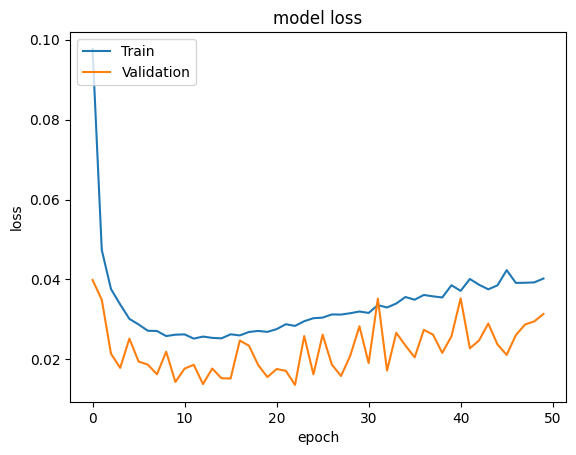

In [112]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot_df, test_size=0.2, random_state=42)
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_cnn_bilstm_model(input_shape, num_classes):
    """
    Builds a CNN-Bidirectional LSTM model for gesture classification.
    
    Args:
    input_shape: Shape of the input data (features, 1).
    num_classes: The number of output classes for classification.
    
    Returns:
    model: A Keras model instance.
    """
    
    # Input layer
    input_layer = Input(shape=input_shape)
    
    # 1D Convolutional layers to extract spatial features
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    # Bidirectional LSTM layers to capture temporal dependencies
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Bidirectional(LSTM(64))(x)
    
    # Fully connected layers
    x = Dense(128, activation='relu')(x)  # New dense layer added
    x = Dropout(0.5)(x)  # Dropout for regularization
    
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)  # Dropout for regularization
    
    # Output layer with softmax activation for classification
    output_layer = Dense(num_classes, activation='softmax')(x)
    
    # Build the model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Example usage:
features = 8  # Number of EMG channels (features)
num_classes = 6  # Number of gesture classes

# Input shape for the Bidirectional LSTM-CNN model (features, 1)
input_shape = (features, 1)

# Build the model
model3 = build_cnn_bilstm_model(input_shape, num_classes)

# Summary of the model architecture
model3.summary()


Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 8, 1)]            0         
                                                                 
 conv1d_26 (Conv1D)          (None, 8, 64)             256       
                                                                 
 batch_normalization_24 (Ba  (None, 8, 64)             256       
 tchNormalization)                                               
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 4, 64)             0         
 ng1D)                                                           
                                                                 
 conv1d_27 (Conv1D)          (None, 4, 128)            24704     
                                                                 
 batch_normalization_25 (Ba  (None, 4, 128)            512

In [115]:
model_history=model3.fit(x=X_train, y=y_train, epochs=50,validation_split=0.22, verbose=1)

Epoch 1/50
29232/29232 [==============================] - 477s 16ms/step - loss: 0.0158 - accuracy: 0.9959 - val_loss: 0.0880 - val_accuracy: 0.9802
Epoch 2/50
29232/29232 [==============================] - 529s 18ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 1.5808e-05 - val_accuracy: 1.0000
Epoch 3/50
29232/29232 [==============================] - 609s 21ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0036 - val_accuracy: 0.9997
Epoch 4/50
29232/29232 [==============================] - 573s 20ms/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.0264 - val_accuracy: 0.9962
Epoch 5/50
29232/29232 [==============================] - 541s 18ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 7.6136e-05 - val_accuracy: 1.0000
Epoch 6/50
29232/29232 [==============================] - 522s 18ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 8.3135e-04 - val_accuracy: 1.0000
Epoch 7/50
29232/29232 [==============================] - 528s 18ms/step - loss: 0.0023 - accu

In [116]:
y_pred_test = model.predict(X_test)
#y_pred_test = np.argmax(y_pred_test, axis=1)  # One-hot encoding'den etiketlere

9370/9370 [==============================] - 45s 5ms/step


In [117]:
# Assuming 'softmax_output' is the output from the softmax layer (shape: (batch_size, num_classes))
# Example of softmax output:
softmax_output = y_pred_test     # Another sample with 6 class probabilities

# Get the index of the maximum probability for each sample (argmax)
predicted_classes = np.argmax(softmax_output, axis=1)

# Convert the predicted class indices to one-hot encoding
y_one_hot_output = tf.keras.utils.to_categorical(predicted_classes, num_classes=softmax_output.shape[1])

# Output the one-hot encoded predictions
print(y_one_hot_output)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]]


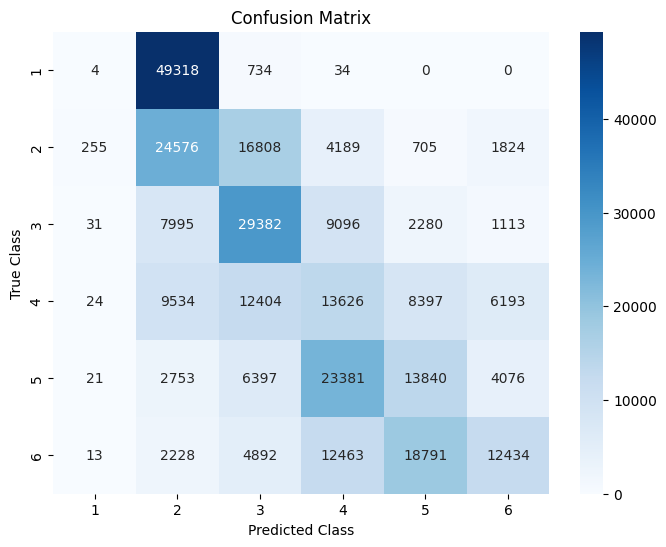

In [118]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert one-hot encoded vectors to class indices using argmax
y_true_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_one_hot_output, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_class, y_pred_class)

# Display the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [119]:
from sklearn.metrics import classification_report

# accuracy and F1 score of classes
rapor = classification_report(y_test, y_one_hot_output, target_names=['1','2','3','4','5','6'])
print(rapor)

              precision    recall  f1-score   support

           1       0.01      0.00      0.00     50090
           2       0.25      0.51      0.34     48357
           3       0.42      0.59      0.49     49897
           4       0.22      0.27      0.24     50178
           5       0.31      0.27      0.29     50468
           6       0.48      0.24      0.33     50821

   micro avg       0.31      0.31      0.31    299811
   macro avg       0.28      0.31      0.28    299811
weighted avg       0.28      0.31      0.28    299811
 samples avg       0.31      0.31      0.31    299811



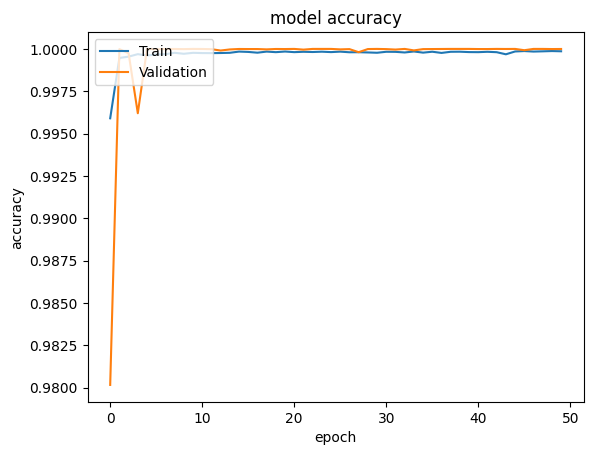

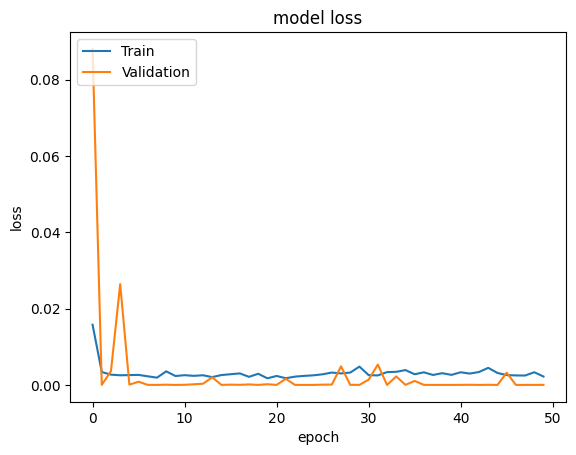

In [120]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

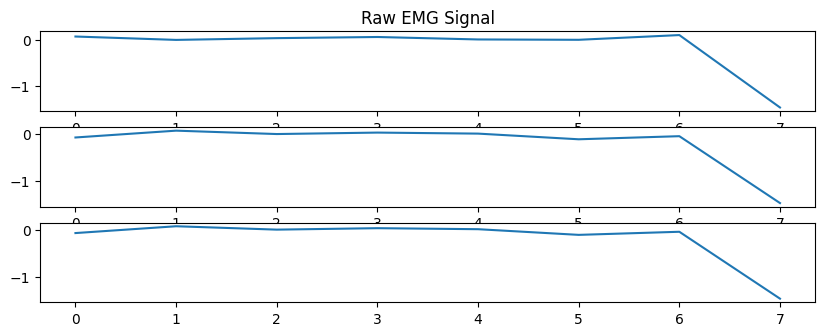

In [124]:
plt.figure(figsize=(10, 6))
plt.subplot(5, 1, 1)
plt.plot(X[0])
plt.title('Raw EMG Signal')
plt.subplot(5, 1, 2)
plt.plot(X[1])

plt.subplot(5, 1, 3)
plt.plot(X[2])

plt.show()

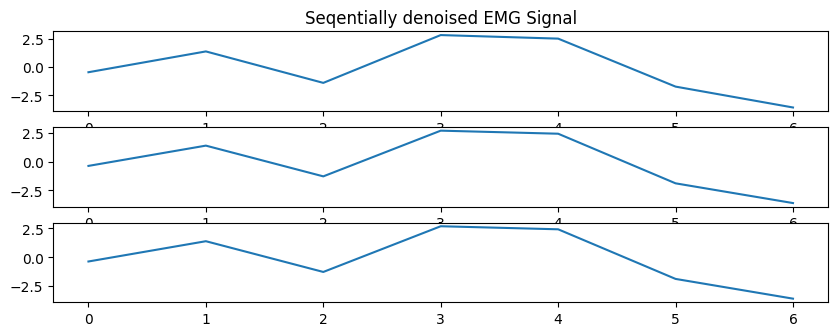

In [125]:
plt.figure(figsize=(10, 6))
plt.subplot(5, 1, 1)
plt.plot(X1[0])
plt.title('Seqentially denoised EMG Signal')
plt.subplot(5, 1, 2)
plt.plot(X1[1])

plt.subplot(5, 1, 3)
plt.plot(X1[2])

plt.show()

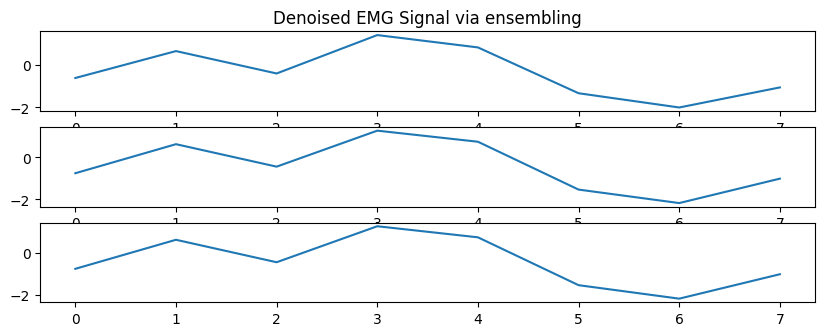

In [126]:
plt.figure(figsize=(10, 6))
plt.subplot(5, 1, 1)
plt.plot(X2[0])
plt.title('Denoised EMG Signal via ensembling')
plt.subplot(5, 1, 2)
plt.plot(X2[1])

plt.subplot(5, 1, 3)
plt.plot(X2[2])

plt.show()